,Malic acid,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,13.0,2.0,2.0,19.0,100.0,2.0,2.0,0.0,2.0,5.0,1.0,3.0,747.0
std,1.0,1.0,0.0,3.0,14.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,315.0
min,11.0,1.0,1.0,11.0,70.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,278.0
25%,12.0,2.0,2.0,17.0,88.0,2.0,1.0,0.0,1.0,3.0,1.0,2.0,500.0
50%,13.0,2.0,2.0,20.0,98.0,2.0,2.0,0.0,2.0,5.0,1.0,3.0,674.0
75%,14.0,3.0,3.0,22.0,107.0,3.0,3.0,0.0,2.0,6.0,1.0,3.0,985.0
max,15.0,6.0,3.0,30.0,162.0,4.0,5.0,1.0,4.0,13.0,2.0,4.0,1680.0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14, cost: 2119.0
Run 1, iteration: 2/100, moves: 0, cost: 2119.0

KMode centroids for 3 clusters
[[ 12.08   1.67   2.3   21.    88.     2.2    2.65   0.26   1.35   2.6
    1.04   2.78 520.  ]
 [ 12.37   1.73   2.12  19.    80.     1.65   2.03   0.37   1.46   3.4
    1.12   3.17 510.  ]
 [ 13.83   1.35   2.7   20.    94.     2.74   2.92   0.32   1.66   2.65
    0.96   3.26 680.  ]]

KMeans centroids for 3 clusters
[[  12.92983871    2.50403226    2.40806452   19.89032258  103.59677419
     2.11112903    1.58403226    0.3883871     1.5033871     5.65032258
     0.88396774    2.36548387  728.33870968]
 [  12.51666667    2.4942029     2.28855072   20.82318841   92.34782609
     2.07072464    1.7584058     0.39014493    1.45188406    4.08695651
     0.94115942    2.49072464  458.23188406]
 [  13.80446809    1.88340426    2.42617021   17.02340426  105.5106383
     2.86723404    3.0

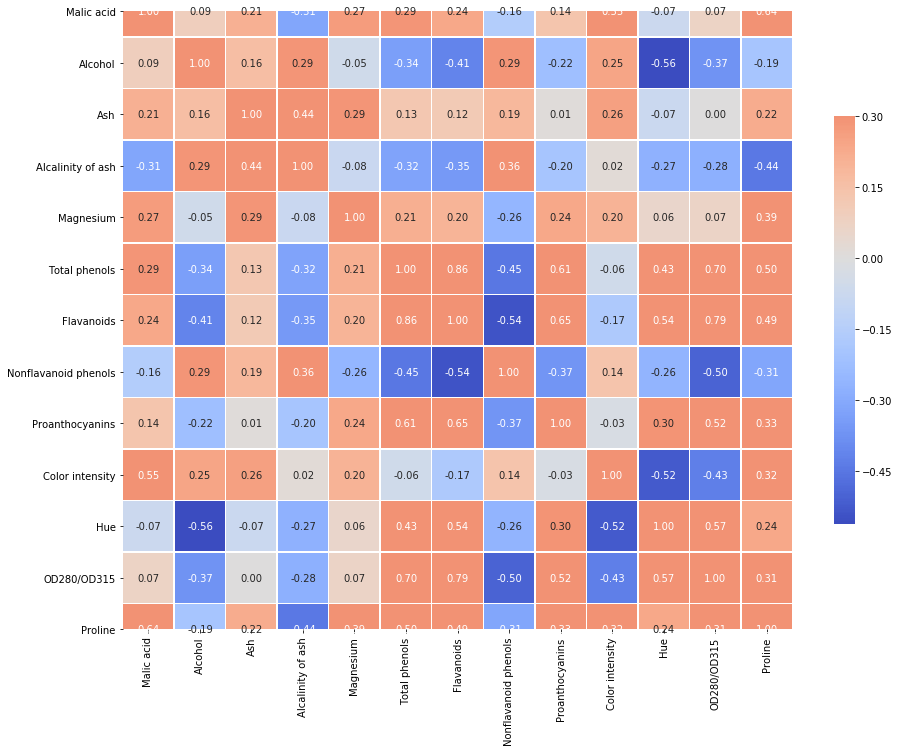

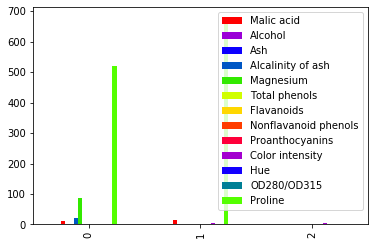

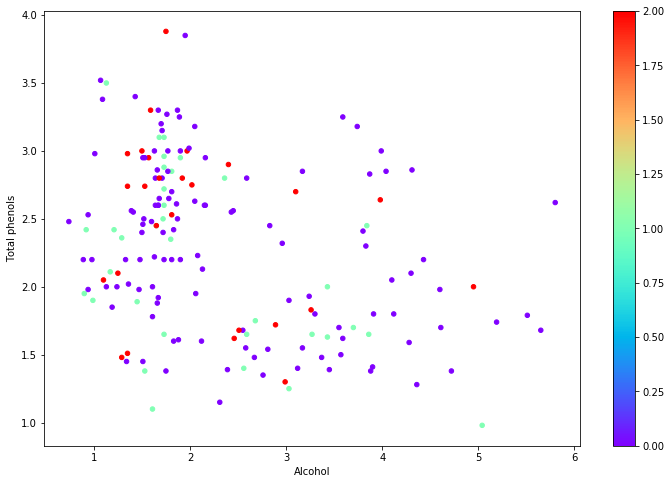

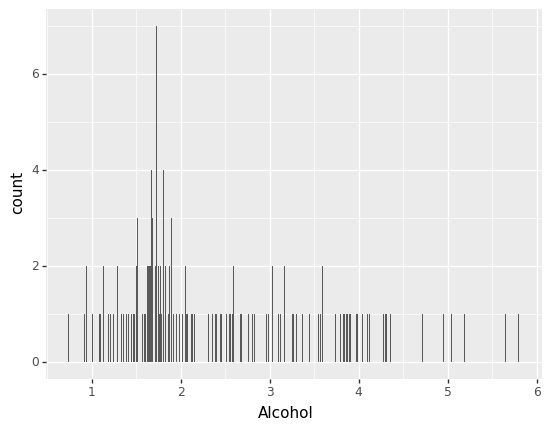

<ggplot: (318035005)>


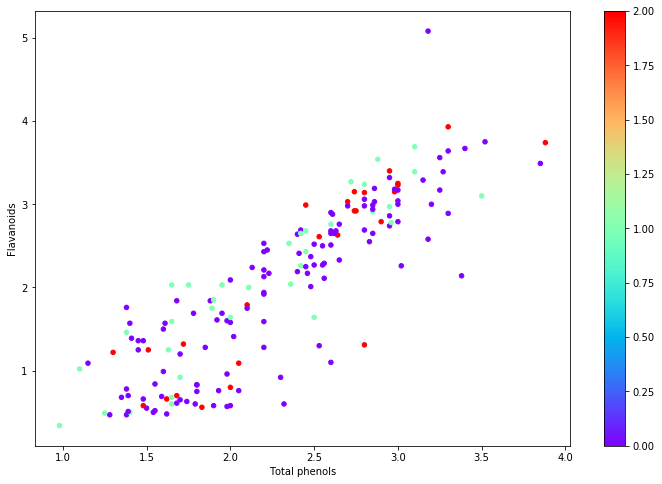

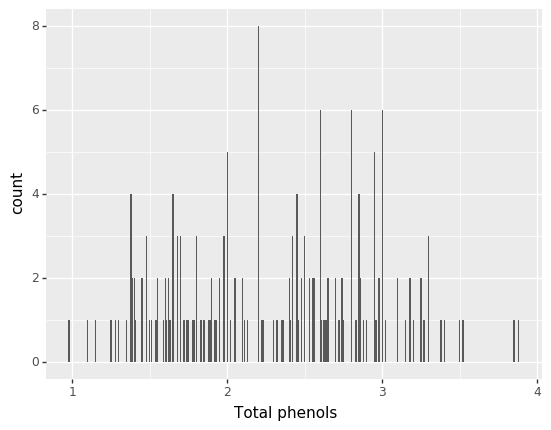

<ggplot: (317983837)>


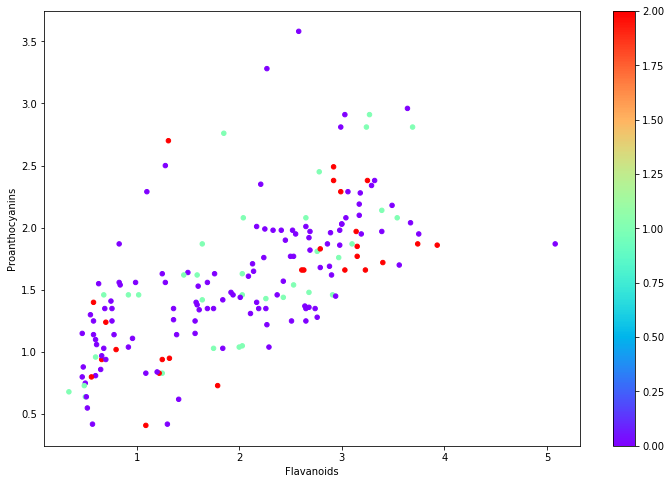

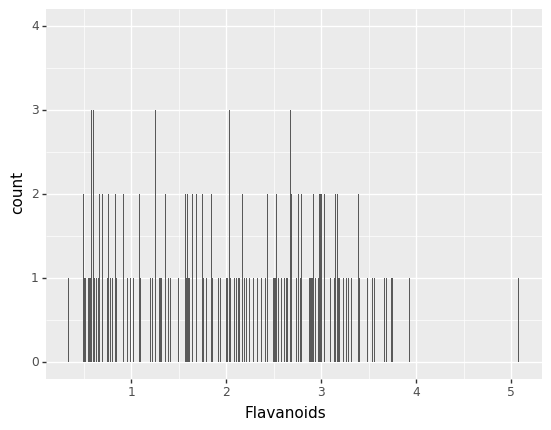

<ggplot: (317924073)>


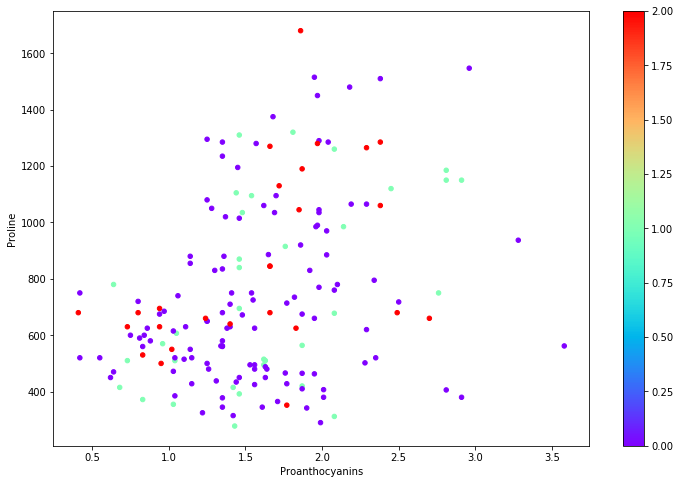

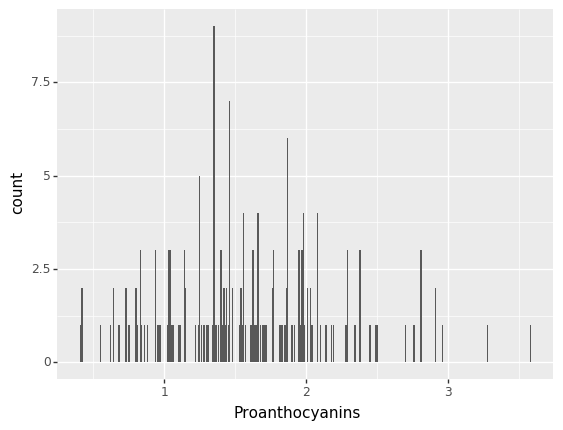

<ggplot: (315886005)>


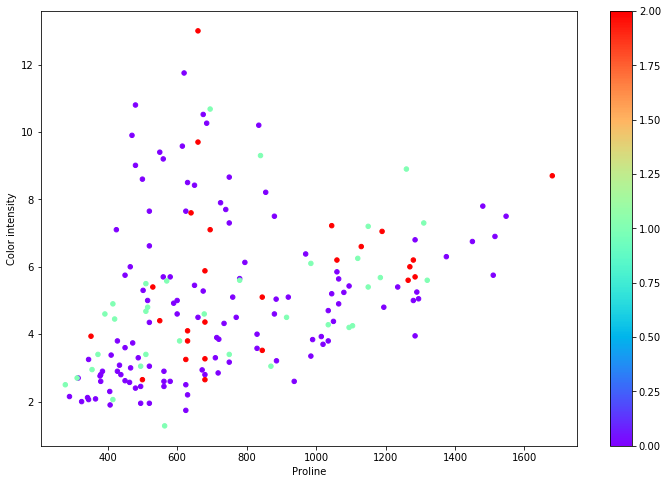

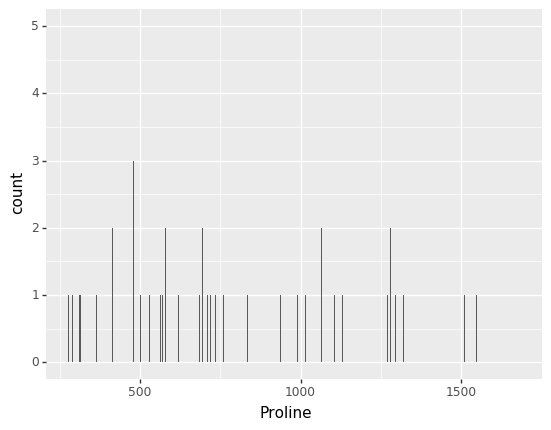

<ggplot: (317988689)>


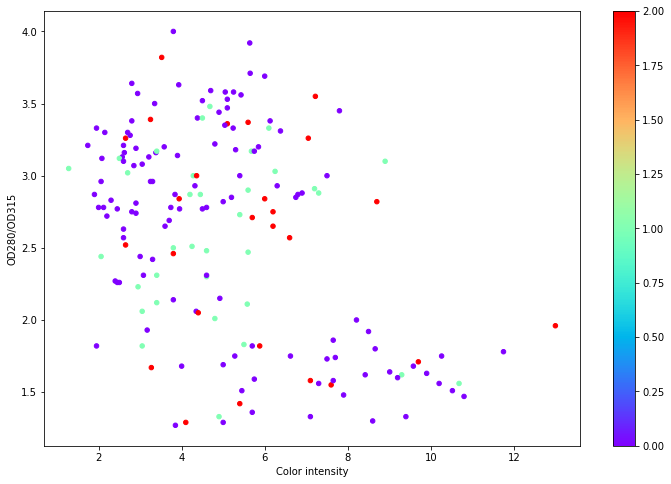

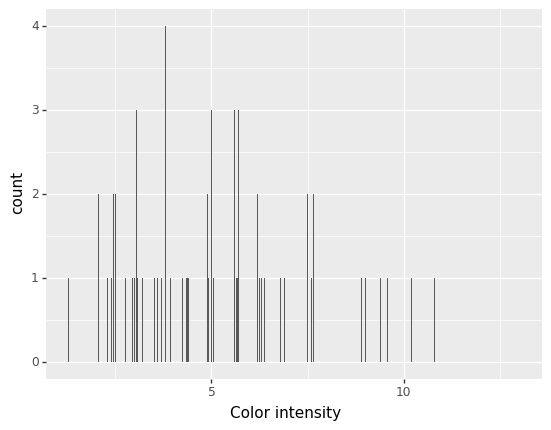

<ggplot: (319386665)>


In [142]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

wine_names = ['Class',  'Malic acid', 'Alcohol','Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']

wineData = "/Users/akshayanagarajan/Downloads/Assignment/wine.data"
dataset = pd.read_csv(wineData, names = wine_names)
X = dataset.iloc[:,1:14].values
y = dataset.iloc[:,0].values



dataset = dataset.drop(['Class'], axis=1)
corr = dataset.corr()
g = sns.heatmap(corr,  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(15,15)

display(np.round(dataset.describe()))
features_to_compare = ['Alcohol', 'Total phenols', 'Flavanoids', 'Proanthocyanins', 'Proline', 'Color intensity', 'OD280/OD315']
dataset.mode().plot(kind='bar', colormap='prism')

kmode = KModes(n_clusters=3, verbose=1)
clusters = kmode.fit_predict(X)
print('\nKMode centroids for 3 clusters')
print(kmode.cluster_centroids_)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
print('\nKMeans centroids for 3 clusters')
print(centroids)

for i in range(len(features_to_compare)-1):
        fig, ax = plt.subplots(1, 1)
        dataset.plot.scatter(x = features_to_compare[i], y = features_to_compare[i+1], c= kmode.labels_, figsize=(12,8), colormap='rainbow', ax=ax, mark_right=False)    
        #dataset.plot.scatter(x = wine_names[i], y = wine_names[i+1], c= kmeans.labels_, figsize=(12,8), colormap='rainbow', ax=ax, mark_right=False)
        print(ggplot(dataset) + aes(x=features_to_compare[i]) + geom_bar(size=20))
        
      